# Analyzing the Stroop Effect

The <a href='https://en.wikipedia.org/wiki/Stroop_effect'>**Stroop Effect**</a> is a test that demonstrates the difference in reaction times of a task. In the Stroop task, you are presented with a list of words. Each word displayed has a color. The task of the participant is to say out loud the color of the ink in which the words is printed. The two conditions of this task are a congruent words condition, and an incongruent words condition. The congruent words condition has the color matching the word of that color (<a href='https://en.wikipedia.org/wiki/Stroop_effect'>see wiki for example</a>). The incongruent words are displayed with the colors not matching the word, (<a href='https://en.wikipedia.org/wiki/Stroop_effect'>see wiki for example</a>). Each case is measured by the time it takes to read the word group. The groups are then compared. 

#### Interference

The Stroop Effect experiment demonstrates Interference. Interference occurs when you look at one of the words, you see both its color and its meaning. These two different bits of information begin to confuse the brain, which then causes a conflict, forcing you to make a choice. Our experiences and stored memories has taught us that word meaning is more important than the color a word is written in. Interference occurs when you try to pay attention only to the color. The interference that happens suggests that you are not always in control of what you can pay attention to. This interference is called the ‘Stroop Effect’.

To explain this occurrence of interference, J. Ridley Stroop developed these two theories:

#### Speed of Processing Theory:
The Speed of Processing Theory states that people can read words much faster than they can name colors. 

#### Selective Attention Theory:
In this theory, interference occurs when naming the actual color of the words requires much more attention than reading the test presented to you.

## Forming A Hypothesis

In the next section, I will define the independent and dependent variables, observe an appropriate hypthesis, and determine the best type of statistical test to run for this investigation.

#### What are the dependent and independent variables?

The **independent variable** is the condition of the word, incongruent or congruent. The **dependent variable** is the time it takes to read through the words.

#### What is the Hypothesis?

For this hypothesis, we should ask the question "Are the congruent and incongruent populations the same? Or do they differ?". Therefore, the notation is as follows:

$$H_0: \mu_{C} - \mu_{I} = 0$$
$$H_1: \mu_{C} - \mu_{I} \neq 0$$

The null of our hypothesis is that $\mu_{C}$ (congruent mean) minus $ \mu_{I} $ (incongruent mean) is equal to 0, and the alternative is $\mu_{C}$ (congruent) minus $ \mu_{I} $ (incongruent) is not equal to zero.

# Statistical Analysis

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('stroopdata.csv')

df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [23]:
df.shape

(24, 2)

Before we do any statistical tests, we can try to get an idea of the differences between the two groups.

In [24]:
df.Congruent - df.Incongruent

0     -7.199
1     -1.950
2    -11.650
3     -7.057
4     -8.134
5     -8.640
6     -9.880
7     -8.407
8    -11.361
9    -11.802
10    -2.196
11    -3.346
12    -2.437
13    -3.401
14   -17.055
15   -10.028
16    -6.644
17    -9.790
18    -6.081
19   -21.919
20   -10.950
21    -3.727
22    -2.348
23    -5.153
dtype: float64

With these differences, we can already see that the data in heavily in favor of the Incongruent group. For now, our alternative hypothesis is true.

In [25]:
# average time for congruent group
con_mean = df.Congruent.mean()
con_mean

14.051125000000004

In [26]:
# average time for incongruent group
incon_mean = df.Incongruent.mean()
incon_mean

22.01591666666667

In [27]:
# observed difference between the group means
obs_diff = incon_mean - con_mean
obs_diff

7.964791666666665

In [28]:
# congruent group to numpy array
con_array = np.array(df.Congruent)

In [29]:
# incongruent group to numpy array
incon_array = np.array(df.Incongruent)

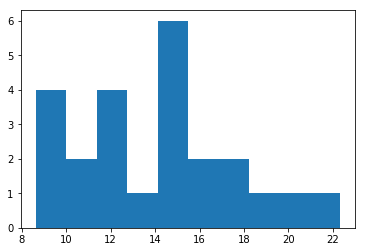

In [30]:
# distribution of congruent group
plt.hist(con_array);

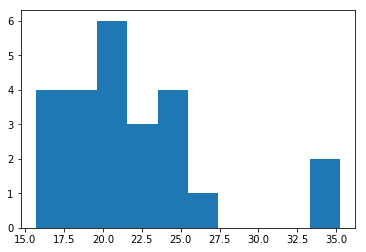

In [31]:
# distribution of incongruent group
plt.hist(incon_array);

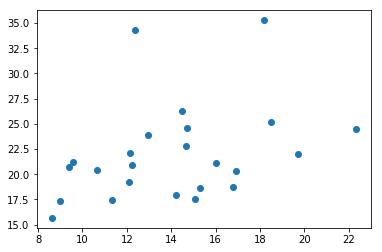

In [32]:
# relationship between two groups
plt.scatter(con_array, incon_array);

With this scatter plot we can see that there is a weak relationship between the two groups

Below, I will use a method known as boostrapping. This method allows us to treat the dataset as an entire population, and not just 24 entries. No more data is needed to gain an understanding of the parameters. It also allows us to simulate the creation of a sampling distribution.

In [33]:
#distribution of the difference in means using bootstrap sampling
con_incon_diffs = []

for _ in range(10000):
    bootsample = df.sample(24, replace = True)
    boot_incon_mean = bootsample.Incongruent.mean()
    boot_con_mean = bootsample.Congruent.mean()
    con_incon_diffs.append(boot_incon_mean - boot_con_mean)

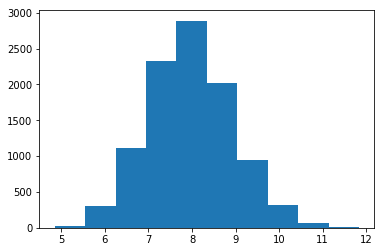

In [34]:
plt.hist(con_incon_diffs);

The sample distribution for this dataset supports the Central Limit Theorem. With a large enough sample size, the sampling distribution of the mean will be normally distributed.

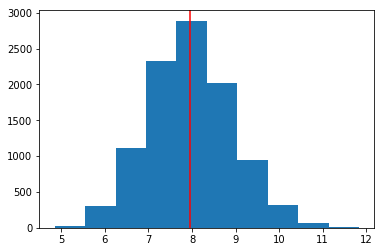

In [35]:
# where observed difference lies
plt.hist(con_incon_diffs);
plt.axvline(obs_diff, color='red');

With this graph we can see that the observed mean falls right in the middle of the sample distribution. We can conclude that the observed mean is the true statistic for the difference in the two groups means.

In [36]:
# p-value of the dataset
(np.array(con_incon_diffs)>obs_diff).mean()

0.4836

The value that was calculated above is known as the p-value. The p-value is the probability of observing a statistic (or one more extreme in favor of the alternative) if the null is true. In this case, the probability of observing that congruent and incongruent groups are the same is about 48%. Furthermore, we can conclude that there is no statistical significance between the two groups since the p-value is so high.

# Statistical Tests

In [37]:
np.percentile(con_incon_diffs, 2.5), np.percentile(con_incon_diffs, 97.5)

(6.147840625000001, 9.940926041666659)

With a Type-I error rate of .05 (95% confidence interval), we reject the null hypothesis in favor of the alternative. The two groups are not equal to each other.

After using a traditional method we can see that our observed difference of 7.96 falls within our 95% confidence interval. With this test we have statistical evidence that the Incongruent group is not the same as the congruent group, and that the incongruent group will take a larger amount of time to complete the test.

Lets see what the variance and standard deviation of the original population, and the bootstrapped data

In [41]:
# original population variance and standard deviation
# congruent group
np.var(con_array), np.std(con_array)

(12.141152859375003, 3.484415712766633)

In [42]:
#incongruent group
np.var(incon_array), np.std(incon_array)

(22.05293382638889, 4.696055134513317)

In [43]:
# bootstrap data variance and standard deviation of the difference in means
np.var(con_incon_diffs), np.std(con_incon_diffs)

(0.9395092072147507, 0.9692828313834672)

In the statistics calculated above, we can see that the bootstrapping method lowered our measure of spread, as well as the average of the squared differences from the mean.

Below I will use a confidence interval for a t-test since the dataset has these characteristics:
* Comparison of two groups
* The data for the dependent variable are continuous (quantitative)
* The outcome is normally distributed
* The two means of the groups are paired together

This test will allow us to determine whether there is statistical evidence that the means of the two groups are significantly different.

In [39]:
import statsmodels.stats.api as sms

X1 = df.Incongruent 
X2 = df.Congruent

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
cm.tconfint_diff(usevar='unequal')

C:\Users\kster\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(5.504885145169363, 10.424698188163974)

Our observed difference also falls within the confidence interval of this t-test.

In [40]:
import statsmodels.api as sms;

df['intercept'] = 1

lm = sms.OLS(df['Incongruent'], df[['intercept', 'Congruent']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Incongruent   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     3.108
Date:                Sun, 13 May 2018   Prob (F-statistic):             0.0918
Time:                        13:49:03   Log-Likelihood:                -69.590
No. Observations:                  24   AIC:                             143.2
Df Residuals:                      22   BIC:                             145.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.3535      3.894      3.943      0.001       7.278      23.429
Congruent      0.4742      0.269      1.763      0.092      -0.084       1.032
==============================================================================
Omnibus:                       15.513   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.580
Skew:                           1.593   Prob(JB):                     0.000414
Kurtosis:                       5.330   Cond. No.                         60.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on this linear regression model, the predicted amount of seconds for the incongruent group is equal to `15.3535 + .4742x`, x being the amount of seconds in the congruent group. If the amount of seconds for the congruent group were 0, we could predict that the amount of seconds in the incongruent group are 15.3535. Also, for every 1 second increase in the congruent group, we could predict that the amount of seconds for the incongruent group would increase by .4742.

The p-values shown in this model indicates that the incongruent group is statistically significant for predicting the congruent group. Also, the R-squared value of 0.124 is really close to zero, indicated that the model is closer to not fitting.

# Conclusion

Based on the statistical analysis, we can reject the null hypothesis. This outcome was not surprising to me because early on we had strong evidence that the two groups were not the same after directly subtracting the two groups in the original dataset. After using bootstrapping to get the distribution of the means, I created a 95% confidence interval (A Type-I Error rate of .05). The observed mean fell within this confidence interval which provided more evidence that the groups are not the same.

Furthermore, this investigation supports the **Selective Attention Theory** in which it takes longer for the brain to process the color than just reading the word displayed. The main cause of the effects observed is the phenomenon called **interference**. As discussed above, this occurs when you try to pay attention only to the color of the word. Our brains our trained to first observe the word written rather than the color of the word.

# Sources

* <a href='https://www.verywellmind.com/what-is-the-stroop-effect-2795832'>The Stroop Effect: Naming the Color but Not the Word</a>
* <a href='https://en.wikipedia.org/wiki/Stroop_effect'>Wikipedia: Stroop Effect</a>
* <a href='http://www2.psychology.uiowa.edu/faculty/mordkoff/GradStats/part%201/I.07%20normal.pdf'>The Assumption(s) of Normality</a>